In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

(1000, 8)


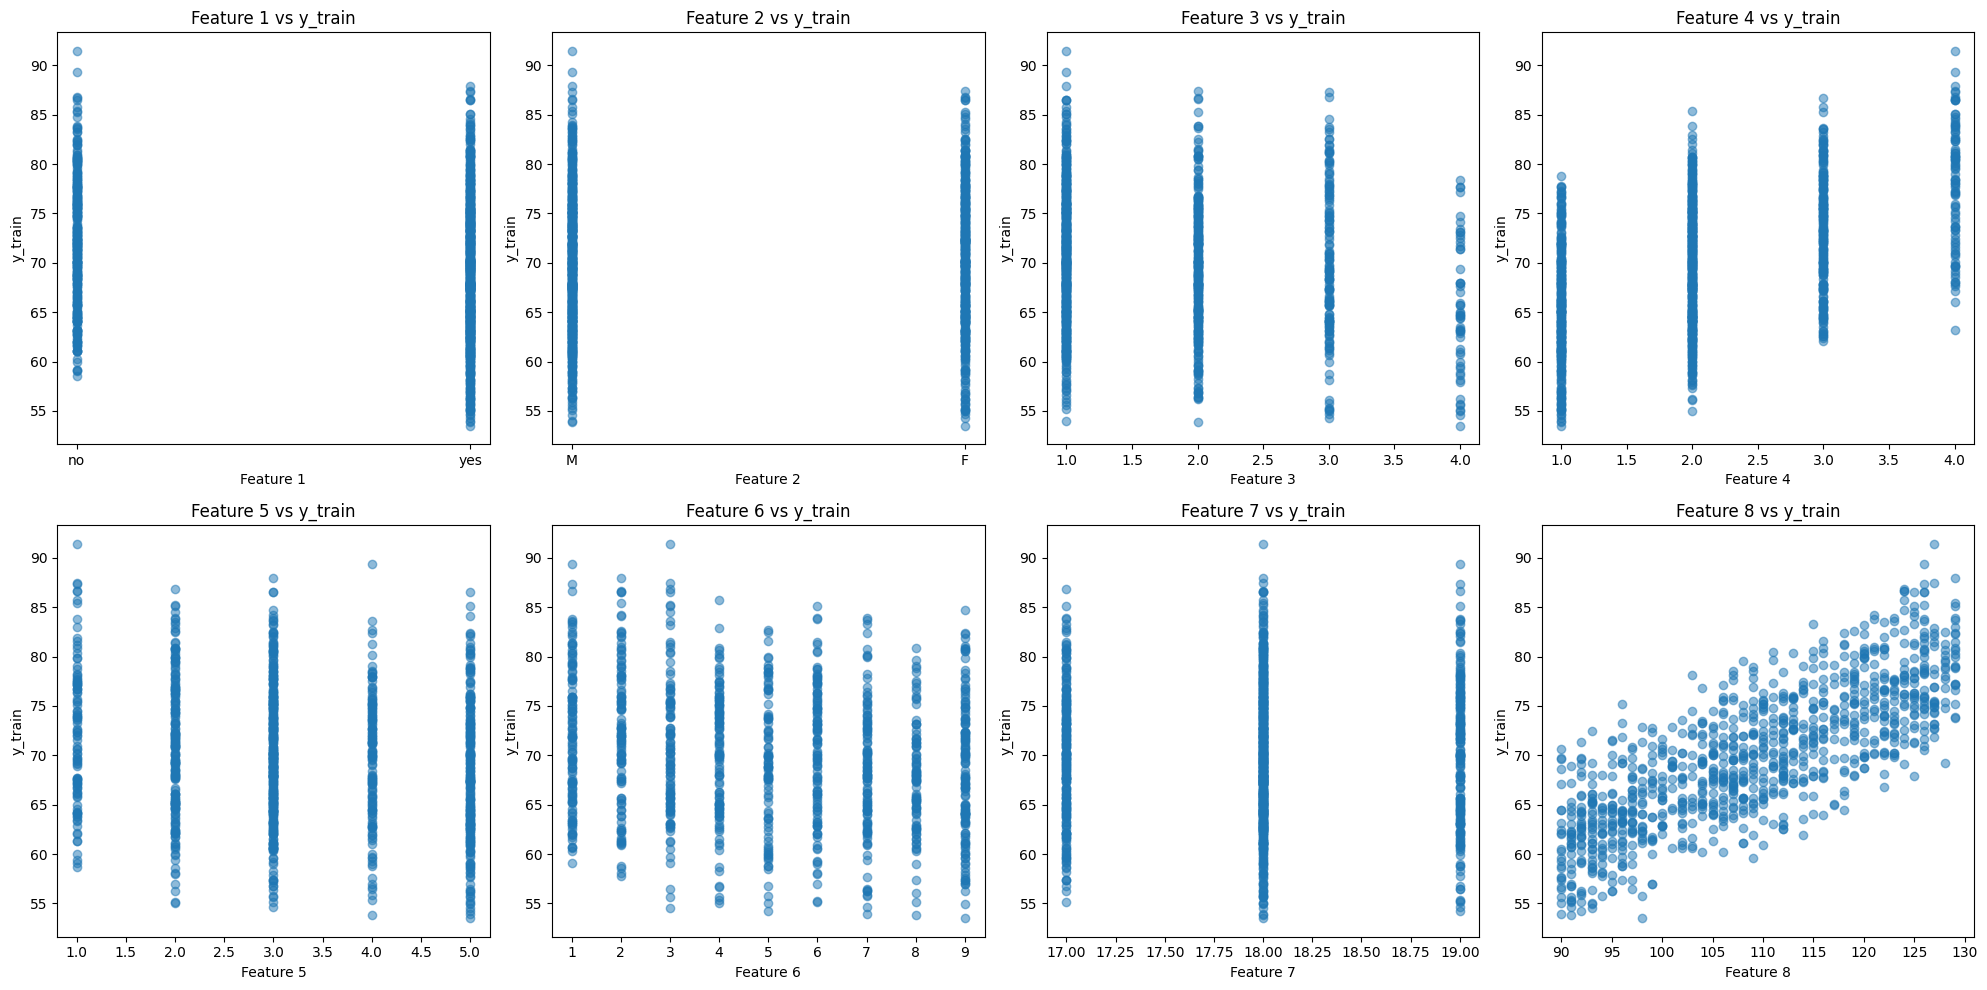

(1000, 8)


In [ ]:
# Use the file namd 'training data' to train the model
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

m = x_train.shape[1]
print(x_train.shape)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs = axs.flatten()
for i in  range(m):
    axs[i].scatter(x_train[:, i], y_train, alpha=0.5)
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('y_train')
    axs[i].set_title(f'Feature {i+1} vs y_train')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

def label_encoding(x_train, data):
    label_encoders = {}
    for column in data.columns[:8]:
        if data[column].dtype == 'object':
            le = LabelEncoder()
            x_train[:, data.columns.get_loc(column)] = le.fit_transform(data[column])
            label_encoders[column] = le
    return x_train, label_encoders
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    # Convert x_train back to DataFrame for easier manipulation
    df = pd.DataFrame(x_train)

    # Label Encoding for categorical features
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Add any new features if needed (example: feature interaction)
    # df['new_feature'] = df['feature1'] * df['feature2']

    # Convert DataFrame back to numpy array
    x_train = df.to_numpy()
    return x_train
x_train, label_encoders = label_encoding(x_train, data)

# Apply feature engineering
x_train = feature_changing(x_train)

print(x_train.shape)


In [ ]:


def z_score(x_train):
    # Calculate the mean and standard deviation of each feature
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)

    # Apply Z-score normalization
    x_train = (x_train - x_mean) / x_std

    return x_train, x_std, x_mean
    x_train_scaled, x_std, x_mean = z_score(x_train)
    print(x_train_scaled)
    print("Scaled x_train:")
    print(x_train_scaled)







In [ ]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = x_train.dot(w) + b
    loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
    return loss


In [ ]:
def compute_cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    mse = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
    return mse

def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, epochs=1000):
    m = x_train.shape[0]

    for i in range(epochs):
        # Calculate the predictions
        predictions = np.dot(x_train, w) + b

        # Compute the gradients
        dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
        db = (1 / m) * np.sum(predictions - y_train)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Optionally, print the cost every 100 epochs
        if i % 100 == 0:
            cost = compute_cost(x_train, y_train, w, b)
            print(f"Epoch {i}: Cost {cost}")

    return w, b

In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Epoch 0: Cost 2444.0423300034918
Epoch 100: Cost 327.3054544981919
Epoch 200: Cost 43.8373155660201
Epoch 300: Cost 5.871893770939666
Epoch 400: Cost 0.7866032490520874
Epoch 500: Cost 0.10538767387045768
Epoch 600: Cost 0.014125032523688835
Epoch 700: Cost 0.0018974593221239636
Epoch 800: Cost 0.0002590360676892475
Epoch 900: Cost 3.947714020582213e-05
Epoch 0: Cost 1.005212890284624e-05
Epoch 100: Cost 6.10823724548602e-06
Epoch 200: Cost 5.579573698364062e-06
Epoch 300: Cost 5.508700147397091e-06
Epoch 400: Cost 5.4991974881896075e-06
Epoch 500: Cost 5.497923194644551e-06
Epoch 600: Cost 5.497752285136241e-06
Epoch 700: Cost 5.497729358171604e-06
Epoch 800: Cost 5.497726281902924e-06
Epoch 900: Cost 5.497725869030032e-06
Congratulations, your accuracy is 100.0%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
